<a href="https://colab.research.google.com/github/jtao/VIST271/blob/main/Opacity_Image_Composition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Opacity and Image Composition

Jian Tao, Texas A&M University

Feb 19, 2022

In [1]:
vizlogo_path = "https://github.com/jtao/VIST271/raw/main/images/viz_logo.png"
vizlogo = "viz_logo.png"

# Read Image

We first download an image from a URL and then open it with the Image.open function in PIL.

In [2]:
from PIL import Image, ImageFilter, ImageDraw, ImageFont, ImageOps
import numpy as np

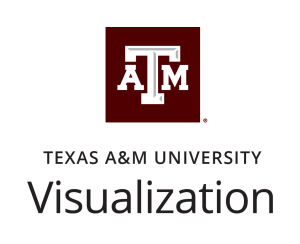

In [3]:
import urllib.request
from PIL import Image
urllib.request.urlretrieve(vizlogo_path, vizlogo)
viz = Image.open(vizlogo)
viz

In [4]:
viz.size

(300, 244)

PNG images usually have four channels. Three color channels for red, green and blue, and the fourth channel is for transparency.

In [5]:
viz.mode

'RGBA'

In [6]:
viz.info

{'dpi': (96, 96)}

Let's convert it into a grayscale image so that we only need to deal with one channel.

Let's make the image very small so that we could print out the grayscale values of each pixel and compare those against the original image.